In [2]:
import gene_inference_utils as utils
import numpy as np
import matplotlib.pyplot as plt
import torch

## Load Data

In [4]:
# in this notebook, all nine target genes are trained on one model with GGCN as the graph layers

# load gene name and connections
gene_name = np.loadtxt('gene_name.txt', dtype=str)
gene_edge = np.loadtxt('gene_edge.txt', dtype=str)
gene_edge_new = np.loadtxt('full_network.txt', dtype=str)

# create name-index mapping
node_map = utils.node_mapping(gene_name)

# create edge list
edge_list = utils.filterEdgeListByGene('Gusb', node_map, gene_edge_new, False)

92 edges not recoginze; the size of edge list is [27746, 2]


In [3]:
# define target downstream gene
target_name = ["Apoe","App","Gusb","Lamp5","Mbp","Pvalb","S100b","Slc30a3","Snca"]

# define training and validating file
train_file = 'input_train_cat.csv'
validate_file = 'input_test_cat.csv'

# create data_loader
train_loader, validate_loader = utils.data_loader(train_file, validate_file, node_map, edge_list, target_name)

train set contains 18542 graphs, validate set contains 4636 graphs


## Train GCN

In [4]:
# define mutltiTaskGCN 
model = utils.GGCN().to(torch.device('cuda'))

In [5]:
train_loss, validate_loss, validate_loss_ind = utils.multi_train(model, train_loader, validate_loader)

  1%|          | 6/1158 [00:00<00:20, 56.92it/s, loss=1.14e-6]

EarlyStopping counter: 1 out of 3


  1%|          | 6/1158 [00:00<00:20, 56.10it/s, loss=2.14e-6]

EarlyStopping counter: 2 out of 3


100%|██████████| 1158/1158 [00:18<00:00, 62.07it/s, loss=1.38e-6]


EarlyStopping counter: 3 out of 3
Early stopping


In [6]:
validate_loss_ind[-1]/(len(validate_loader))

array([8.67792695e-06, 5.07264462e-07, 1.31291819e-07, 4.83059297e-07,
       6.52171691e-07, 2.66837465e-07, 1.38762443e-07, 1.00436673e-07,
       1.18123626e-06])

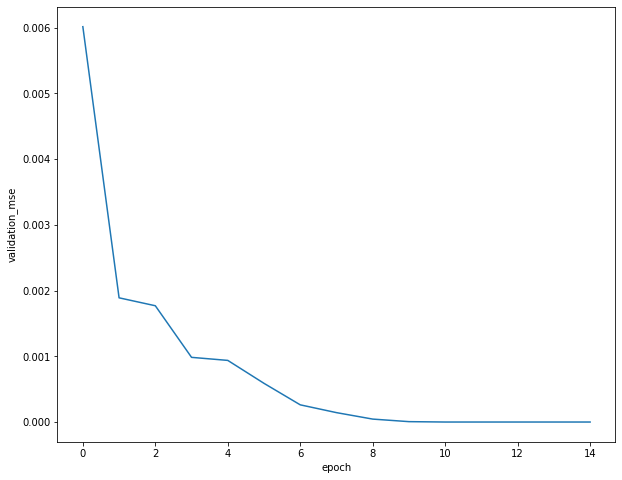

In [8]:
ep = [i for i in range(15)]
plt.figure(figsize=(10 ,8))
plt.plot(ep, validate_loss)
plt.xlabel('epoch')
plt.ylabel('validation_mse')
plt.show()

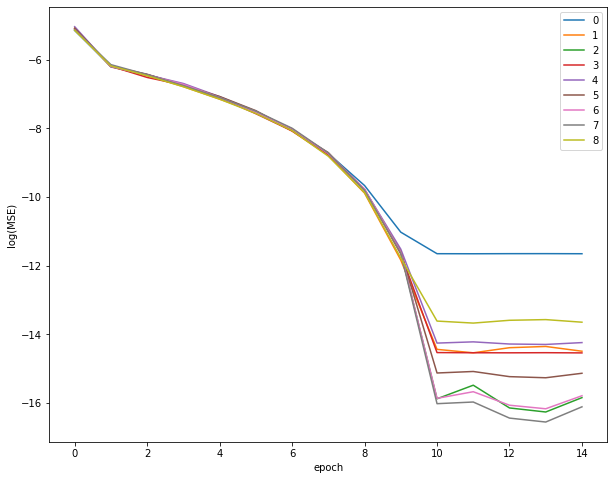

In [9]:
plt.figure(figsize=(10, 8))
for i in range(9): 
    plt.plot(ep, np.log(np.array(validate_loss_ind)[:, i]/(len(validate_loader))), label=str(i))
plt.legend()
plt.xlabel('epoch')
plt.ylabel('log(MSE)')
plt.show()